In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

In [ ]:
# Enable inline plotting
%matplotlib inline

In [ ]:
# Display title and introduction
display(Markdown("# Heart Disease Prediction"))
display(Markdown("This project aims to predict heart disease using Logistic Regression. The dataset is preprocessed, and the model is evaluated using various metrics and visualizations."))

# Heart Disease Prediction

This project aims to predict heart disease using Logistic Regression. The dataset is preprocessed, and the model is evaluated using various metrics and visualizations.

In [ ]:
# Load the dataset
display(Markdown("## Loading the Dataset"))
data = pd.read_csv('Heart Disease.csv')
display(Markdown("### Dataset Preview"))
display(data.head())
display(Markdown("### Dataset Info"))
display(data.info())

## Loading the Dataset

### Dataset Preview

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease (in next 10 years)
0,Male,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender                            4240 non-null   object 
 1   age                               4240 non-null   int64  
 2   education                         4135 non-null   float64
 3   currentSmoker                     4240 non-null   int64  
 4   cigsPerDay                        4211 non-null   float64
 5   BPMeds                            4187 non-null   float64
 6   prevalentStroke                   4240 non-null   int64  
 7   prevalentHyp                      4240 non-null   int64  
 8   diabetes                          4240 non-null   int64  
 9   totChol                           4190 non-null   float64
 10  sysBP                             4240 non-null   float64
 11  diaBP                             4240 non-null   float64
 12  BMI   

None

In [ ]:
# Preprocess the dataset
display(Markdown("## Preprocessing the Dataset"))

## Preprocessing the Dataset

In [ ]:
# Convert categorical variables
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})

In [ ]:
# Handle missing values
data = data.replace('NA', np.nan)
numerical_columns = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']
imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])


# Impute any remaining NaN values across all features
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Drop rows with any remaining NaN values after imputation
data = data.dropna()

In [ ]:
# Select features and target
features = ['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
            'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
            'diaBP', 'BMI', 'heartRate', 'glucose']
X = data[features]
y = data['Heart Disease (in next 10 years)']
display(Markdown("### Dataset Info After Preprocessing"))
display(data.info())

### Dataset Info After Preprocessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender                            4240 non-null   float64
 1   age                               4240 non-null   float64
 2   education                         4240 non-null   float64
 3   currentSmoker                     4240 non-null   float64
 4   cigsPerDay                        4240 non-null   float64
 5   BPMeds                            4240 non-null   float64
 6   prevalentStroke                   4240 non-null   float64
 7   prevalentHyp                      4240 non-null   float64
 8   diabetes                          4240 non-null   float64
 9   totChol                           4240 non-null   float64
 10  sysBP                             4240 non-null   float64
 11  diaBP                             4240 non-null   float64
 12  BMI   

None

In [ ]:
# Check for constant features
display(Markdown("### Checking for Constant Features"))
constant_features = [col for col in X.columns if X[col].nunique() == 1]
if constant_features:
    display(Markdown(f"Warning: The following features have constant values and will be dropped: {constant_features}"))
    X = X.drop(columns=constant_features)
display(Markdown(f"Updated features: {list(X.columns)}"))

### Checking for Constant Features

Updated features: ['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [ ]:
# Split the data
display(Markdown("## Splitting the Data"))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(Markdown(f"Training set shape: {X_train.shape}"))
display(Markdown(f"Testing set shape: {X_test.shape}"))

## Splitting the Data

Training set shape: (3392, 15)

Testing set shape: (848, 15)

In [ ]:
# Scale the features
display(Markdown("## Feature Scaling"))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
display(Markdown("Feature scaling completed successfully."))

## Feature Scaling

Feature scaling completed successfully.

In [ ]:
# Train the Logistic Regression model
display(Markdown("## Training the Model"))
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)


## Training the Model

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions
display(Markdown("## Making Predictions"))
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]


## Making Predictions

In [ ]:
# Evaluate the model
display(Markdown("## Model Evaluation"))
# Calculate metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
}
display(Markdown("### Performance Metrics"))
metrics_df = pd.DataFrame(metrics.items(), columns=['Metric', 'Value'])
metrics_df['Value'] = metrics_df['Value'].round(4)
display(metrics_df)

## Model Evaluation

### Performance Metrics

,Metric,Value
0,Accuracy,0.8561
1,Precision,0.5333
2,Recall,0.0650
3,F1-Score,0.1159


### Confusion Matrix

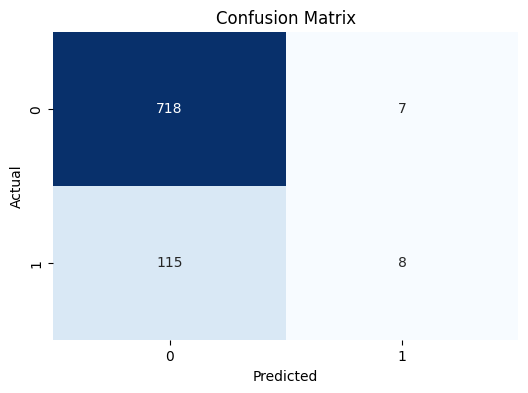

In [ ]:
# Confusion Matrix
display(Markdown("### Confusion Matrix"))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ROC Curve

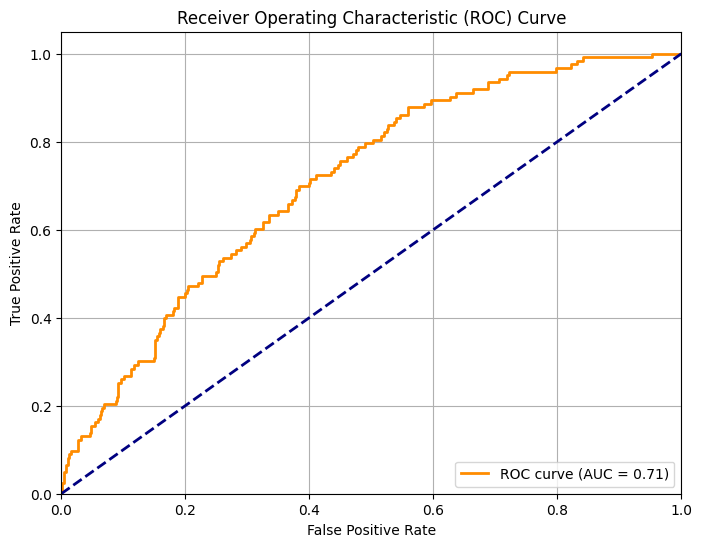

In [ ]:
# ROC Curve
display(Markdown("### ROC Curve"))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Feature Importance

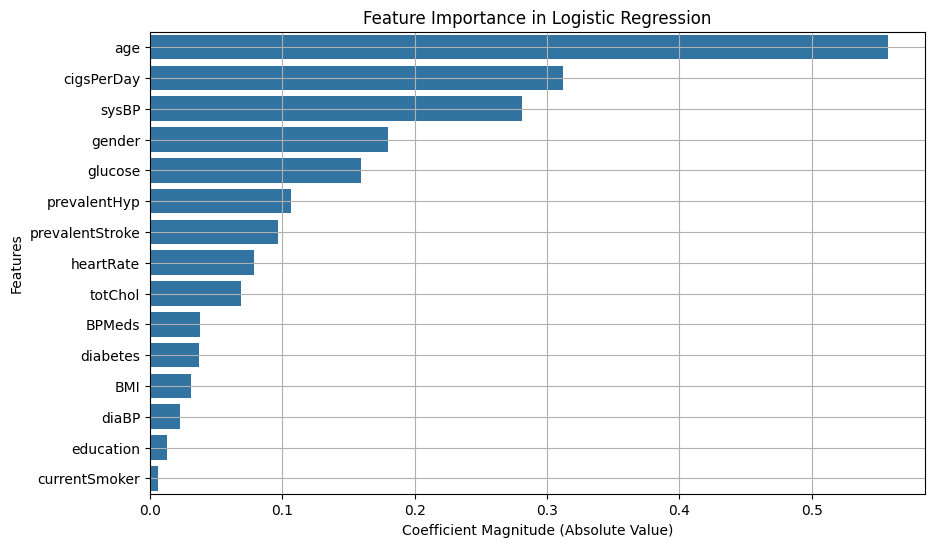

In [ ]:
# Feature Importance (using coefficients for Logistic Regression)
display(Markdown("## Feature Importance"))
plt.figure(figsize=(10, 6))
feature_imp = pd.Series(np.abs(log_reg.coef_[0]), index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Coefficient Magnitude (Absolute Value)')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression')
plt.grid(True)
plt.show()